In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from sod.jupyter.share import * # our user defined functions
# Print a nice doc of the module functions just imported (`printdoc` is defined in `share`)
printdoc()

join,"Join two or more pathname components, inserting '/' as needed"
abspath,Return an absolute path.
dirname,Returns the directory component of a pathname
isfile,Test whether a path is a regular file
isdir,Return true if the pathname refers to an existing directory.
basename,Returns the final component of a pathname
sys,This module provides access to some objects used or maintained by the
os,OS routines for NT or Posix depending on what system we're on
re,Support for regular expressions (RE)
time,This module provides various functions to manipulate time values
inspect,Get useful information from live Python objects


In [2]:
# matplotlib stuff. Note that rcParams need to be input from the second cell on
# (https://github.com/jupyter/notebook/issues/3385#issuecomment-376010658)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# for font size details, see https://stackoverflow.com/a/39566040
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.rcParams['axes.titlesize'] = plt.rcParams['font.size']
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'helvetica,arial'

# pandas settings. Some are set in `share`, display max_rows is explicitly set here
pd.set_option('display.max_rows', 20)

TESTSETNAME = 'allset_unlabelled_annotation2.hdf'

In [3]:
eval_df = read_summary_eval_df()
eval_df = eval_df[eval_df.relative_filepath.str.endswith(os.sep + TESTSETNAME)]
printhtml('<h3>Loaded evaluations performed on testset "%s"</h3>' % TESTSETNAME)
display(eval_df)

Loaded evaluations performed on testset "allset_unlabelled_annotation2.hdf"

,clf,feats,n_estimators,max_samples,random_state,roc_auc_score,average_precision_score,log_loss,best_th_roc_curve,best_th_pr_curve,behaviour,contamination,relative_filepath,tr_set
2538,IsolationForest,"psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec",100,1024,42,0.938151,0.926122,0.658329,0.639560,0.678275,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=42/allset_unlabelled_annotation2.hdf",allset_train.hdf
2539,IsolationForest,"psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec",200,1024,11,0.937190,0.926656,0.663101,0.662334,0.688424,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=200&random_state=11/allset_unlabelled_annotation2.hdf",allset_train.hdf
2540,IsolationForest,"psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec",50,1024,11,0.936968,0.926613,0.672072,0.672145,0.706885,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=11/allset_unlabelled_annotation2.hdf",allset_train.hdf
2541,IsolationForest,"psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec",100,1024,11,0.935997,0.925462,0.664150,0.656965,0.684540,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=11/allset_unlabelled_annotation2.hdf",allset_train.hdf
2542,IsolationForest,"psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec",50,1024,25,0.928054,0.912020,0.680892,0.661674,0.673252,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=25/allset_unlabelled_annotation2.hdf",allset_train.hdf
2543,IsolationForest,"psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec",200,1024,42,0.938487,0.925880,0.666293,0.659681,0.684257,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=200&random_state=42/allset_unlabelled_annotation2.hdf",allset_train.hdf
2544,IsolationForest,"psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec",200,1024,25,0.933366,0.921982,0.669765,0.666830,0.686046,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=200&random_state=25/allset_unlabelled_annotation2.hdf",allset_train.hdf
2545,IsolationForest,"psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec",100,1024,25,0.928442,0.915777,0.673610,0.667481,0.683581,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=100&random_state=25/allset_unlabelled_annotation2.hdf",allset_train.hdf
2546,IsolationForest,"psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec",50,1024,42,0.935668,0.926260,0.664041,0.649186,0.689822,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=1024&n_estimators=50&random_state=42/allset_unlabelled_annotation2.hdf",allset_train.hdf
2547,IsolationForest,"psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec",100,16384,25,0.933161,0.914521,0.595034,0.619288,0.649514,new,auto,"clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@0.2sec,psd@0.5sec,psd@1sec,psd@2sec,psd@5sec&behaviour=new&contamination=auto&max_samples=16384&n_estimators=100&random_state=25/allset_unlabelled_annotation2.hdf",allset_train.hdf


In [4]:
mean = 'median'
for metric, _eval_df in rank_eval(eval_df,
                                  # evalmetrics=['roc_auc_score', 'average_precision_score', 'f1_max'],
                                  evalmetrics=['average_precision_score', 'roc_auc_score'],
                                  columns=['clf', 'feats', 'n_estimators', 'max_samples'],
                                  mean=mean).items():
    printhtml("<h3>Ranking models according to %s (for each group, showing %s on 'random_state')</h3>" % (metric, mean))
    display(_eval_df)

Ranking models according to average_precision_score (for each group, showing median on 'random_state')

,clf,feats,n_estimators,max_samples,average_precision_score
530,IsolationForest,"psd@2sec,psd@5sec",100,2048,0.940823
524,IsolationForest,"psd@2sec,psd@5sec",50,2048,0.940502
536,IsolationForest,"psd@2sec,psd@5sec",200,2048,0.940499
535,IsolationForest,"psd@2sec,psd@5sec",200,1024,0.939954
537,IsolationForest,"psd@2sec,psd@5sec",200,4096,0.939709
553,IsolationForest,psd@5sec,200,1024,0.939545
554,IsolationForest,psd@5sec,200,2048,0.939378
548,IsolationForest,psd@5sec,100,2048,0.938817
529,IsolationForest,"psd@2sec,psd@5sec",100,1024,0.938762
555,IsolationForest,psd@5sec,200,4096,0.938628


Ranking models according to roc_auc_score (for each group, showing median on 'random_state')

,clf,feats,n_estimators,max_samples,roc_auc_score
536,IsolationForest,"psd@2sec,psd@5sec",200,2048,0.953056
541,IsolationForest,psd@5sec,50,1024,0.953018
530,IsolationForest,"psd@2sec,psd@5sec",100,2048,0.952992
547,IsolationForest,psd@5sec,100,1024,0.952977
553,IsolationForest,psd@5sec,200,1024,0.952896
540,IsolationForest,psd@5sec,50,512,0.952404
554,IsolationForest,psd@5sec,200,2048,0.952323
542,IsolationForest,psd@5sec,50,2048,0.952044
548,IsolationForest,psd@5sec,100,2048,0.951999
529,IsolationForest,"psd@2sec,psd@5sec",100,1024,0.951993


Evaluation metrics (all classifiers) by number of features

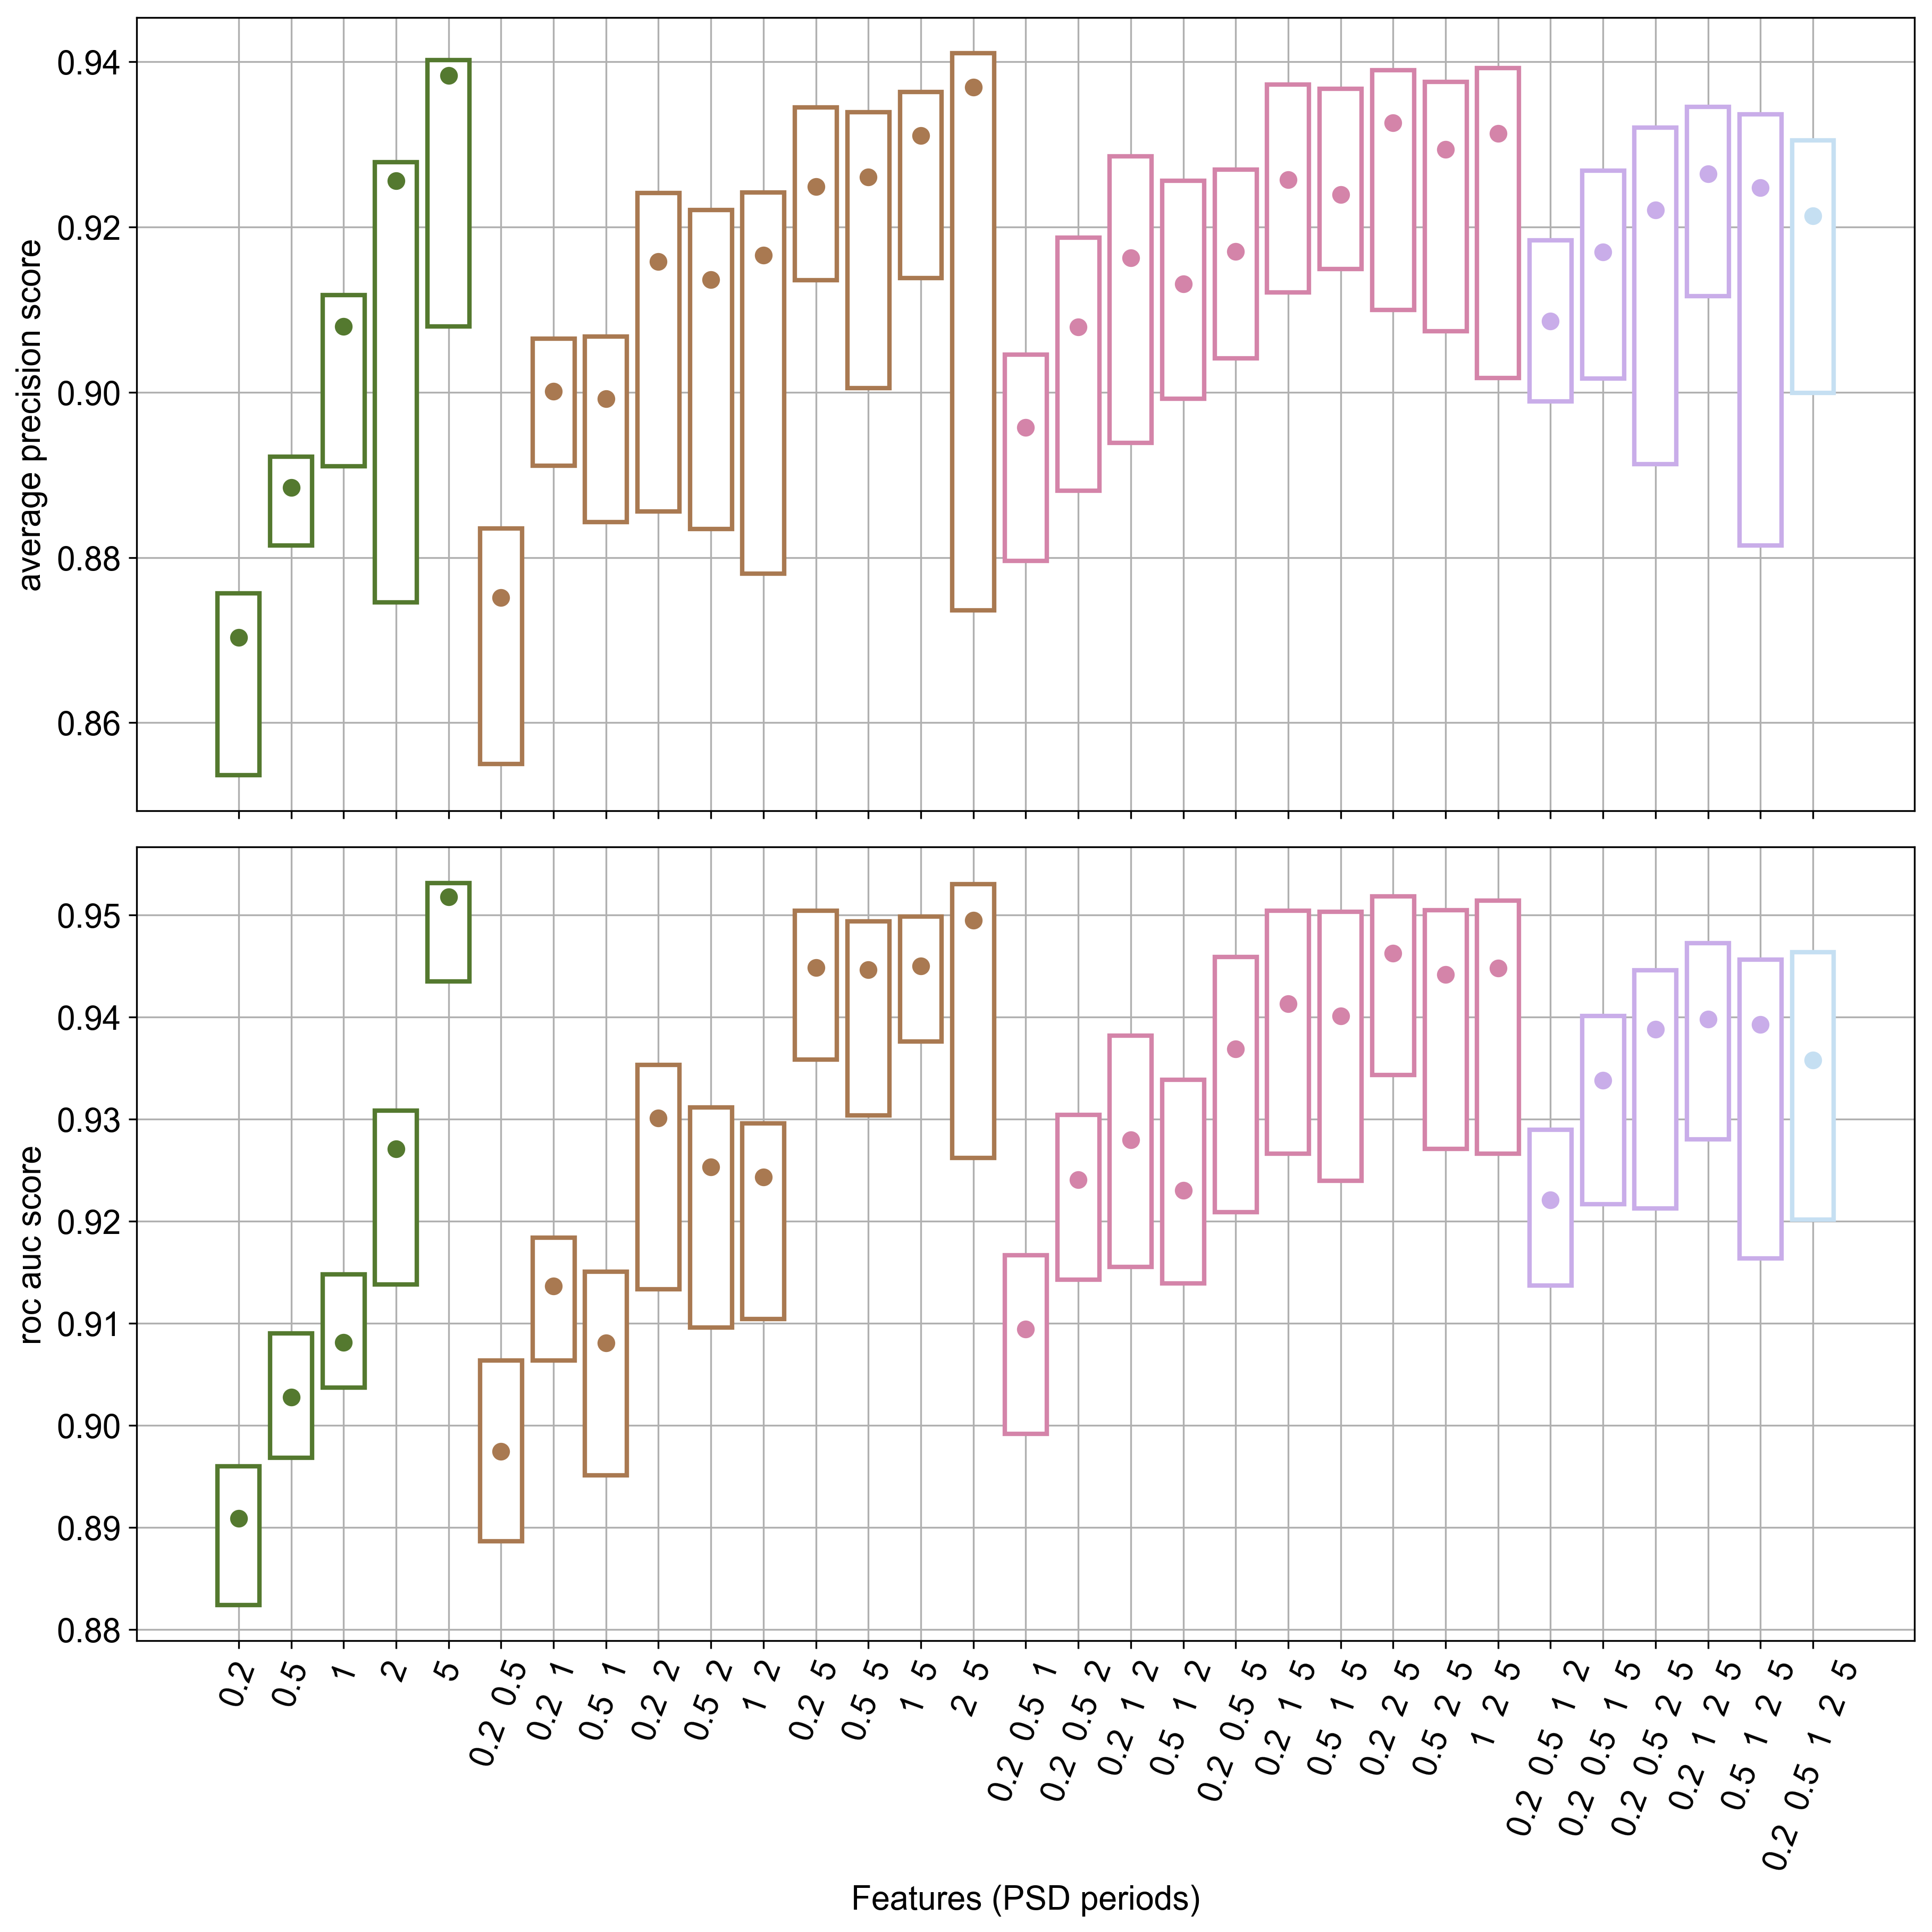

In [5]:
printhtml('<h3>Evaluation metrics (all classifiers) by number of features</h3>')
plot_feats_vs_evalmetrics(eval_df)

In [6]:
# plot and dataframe settings to be applyed from now on:
plt.rcParams['figure.figsize'] = (12, 6)
decimals = 4
n_estimators = np.unique(eval_df.n_estimators.values)
max_samples = np.unique(eval_df.max_samples.values)

# filtering:
printhtml('<h3>Analyzing Hyperparameters keeping only evaluations using at least the feature "psd@5sec"</h3>')
eval_df = eval_df[eval_df.feats.str.contains('psd@5sec')]

Analyzing Hyperparameters keeping only evaluations using at least the feature psd@5sec

Score used: average_precision_score

Min average_precision_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.8736  0.9062  0.9177  0.9089  0.9078  0.9041
             100      0.8826  0.9152  0.9197  0.9143  0.9103  0.9078
             200      0.9085  0.9184  0.9219  0.9152  0.9141  0.9091

Median average_precision_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9182  0.9280  0.9314  0.9288  0.9237  0.9195
             100      0.9211  0.9305  0.9323  0.9298  0.9252  0.9216
             200      0.9207  0.9314  0.9317  0.9303  0.9254  0.9220

Max average_precision_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9373  0.9391  0.9410  0.9393  0.9381  0.9376
             100      0.9396  0.9402  0.9409  0.9402  0.9386  0.9383
             200      0.9352  0.9403  0.9410  0.9398  0.9387  0.9386

average_precision_score vs "max_samples" for diffetent "n_estimators" values

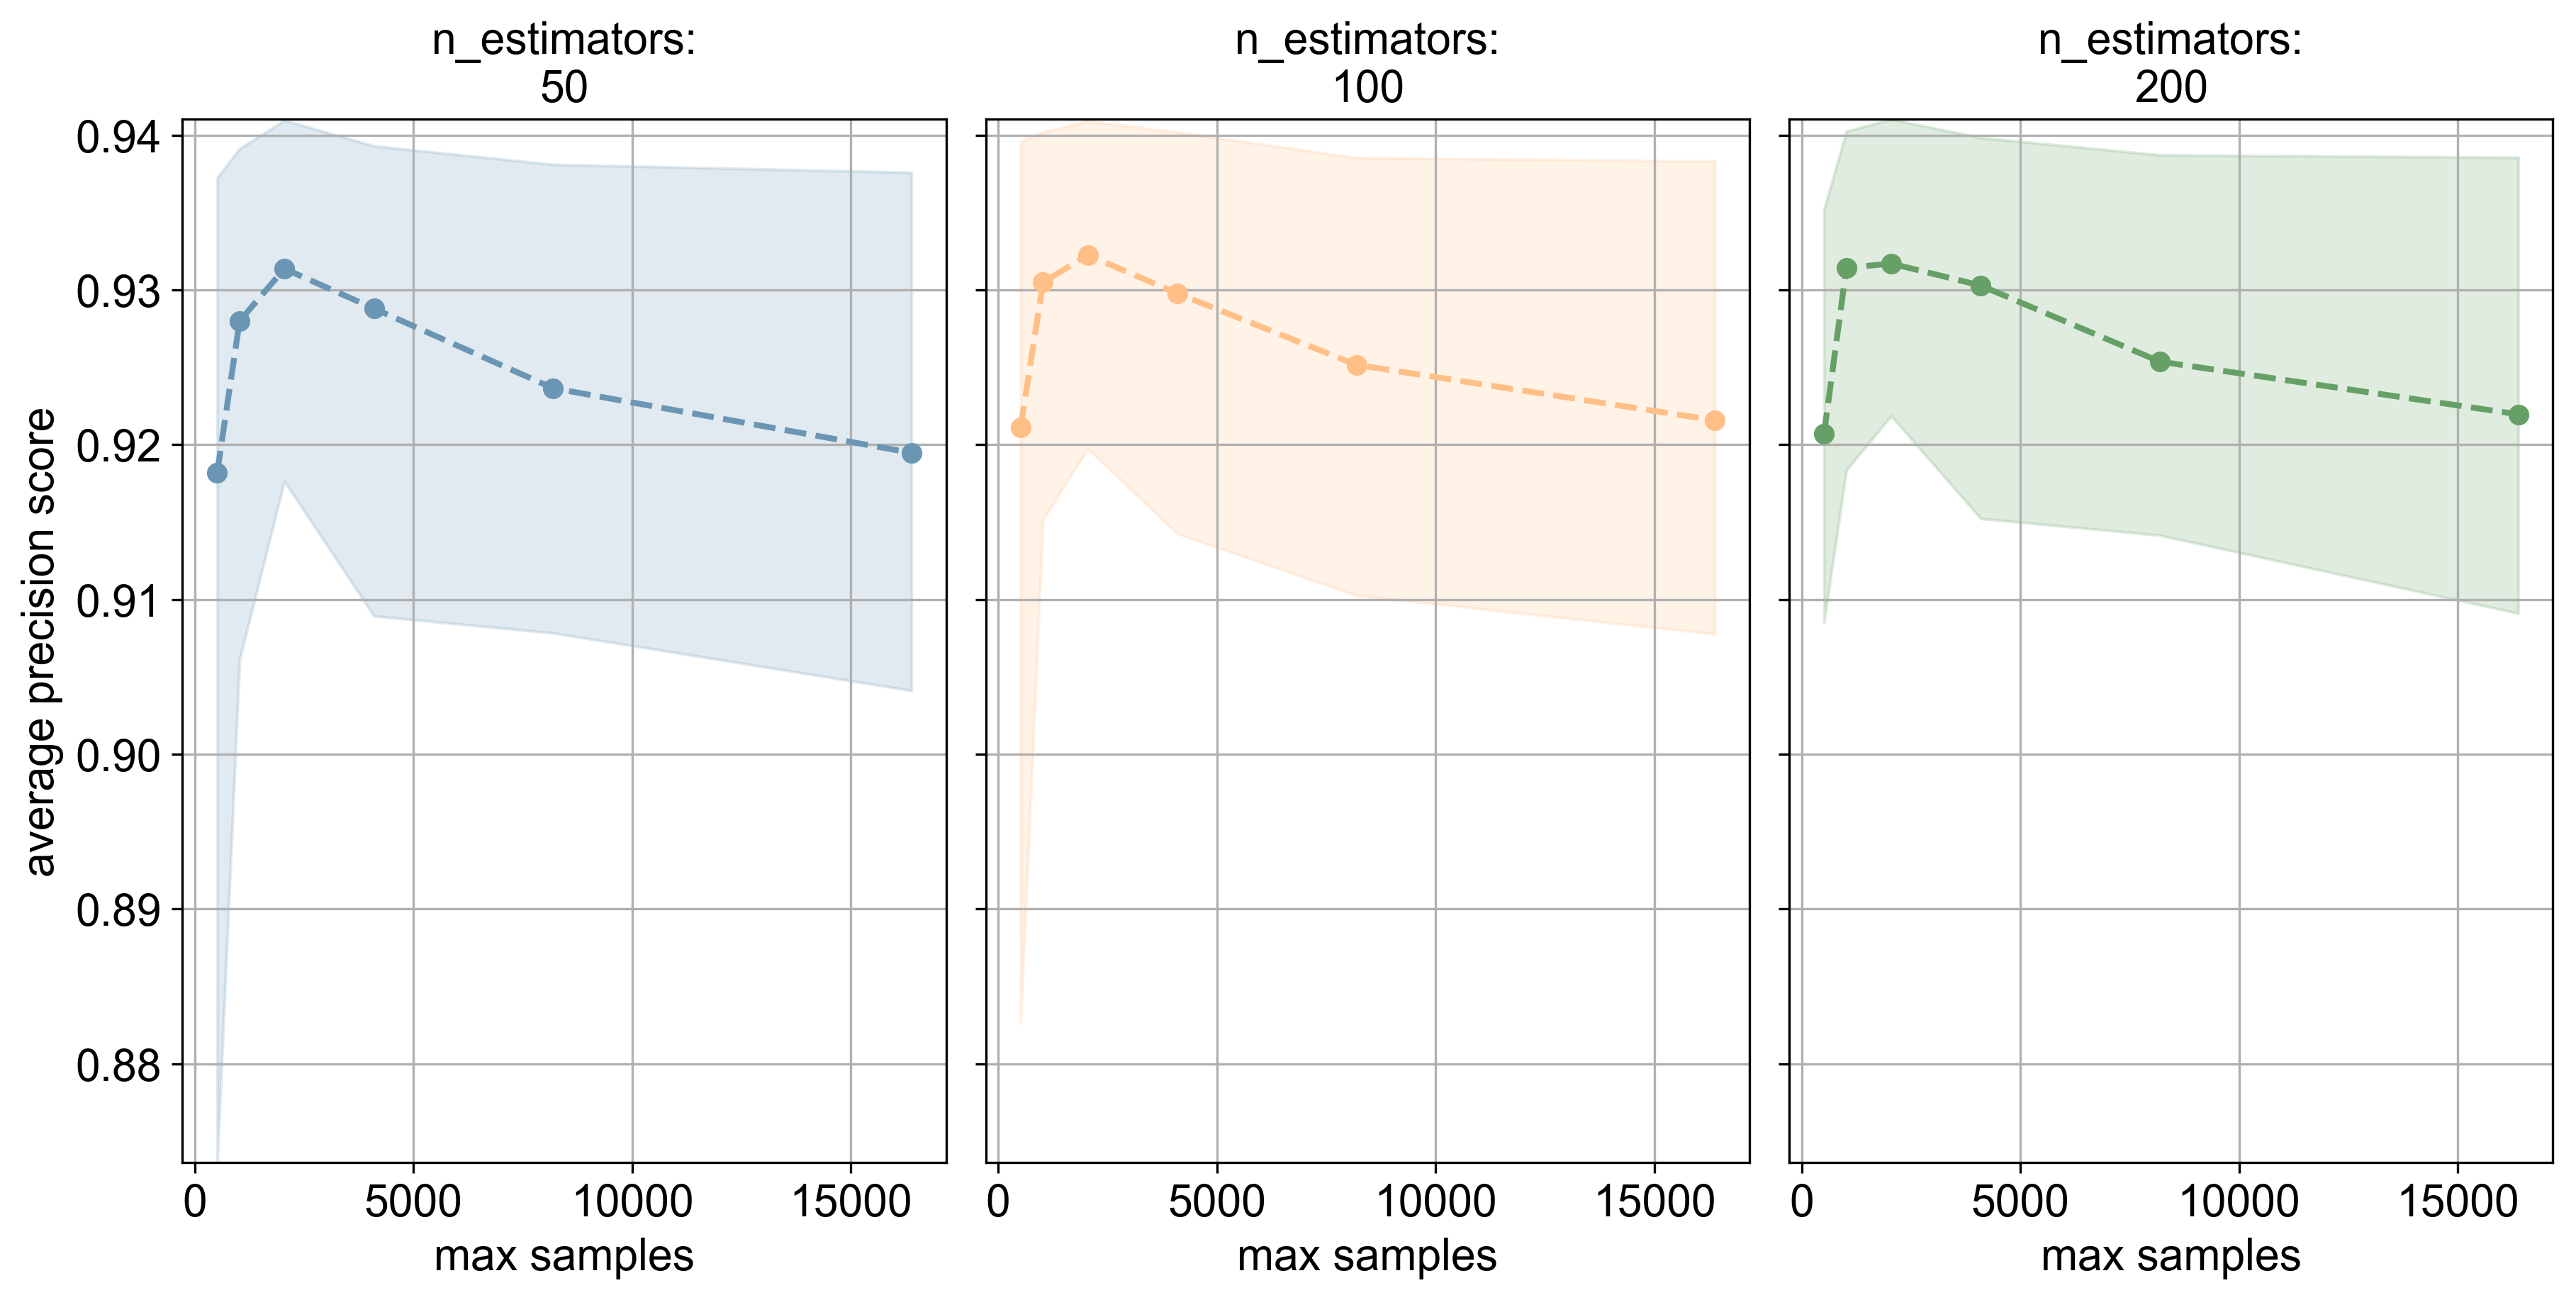

average_precision_score vs "n_estimators" for different "max_samples" values

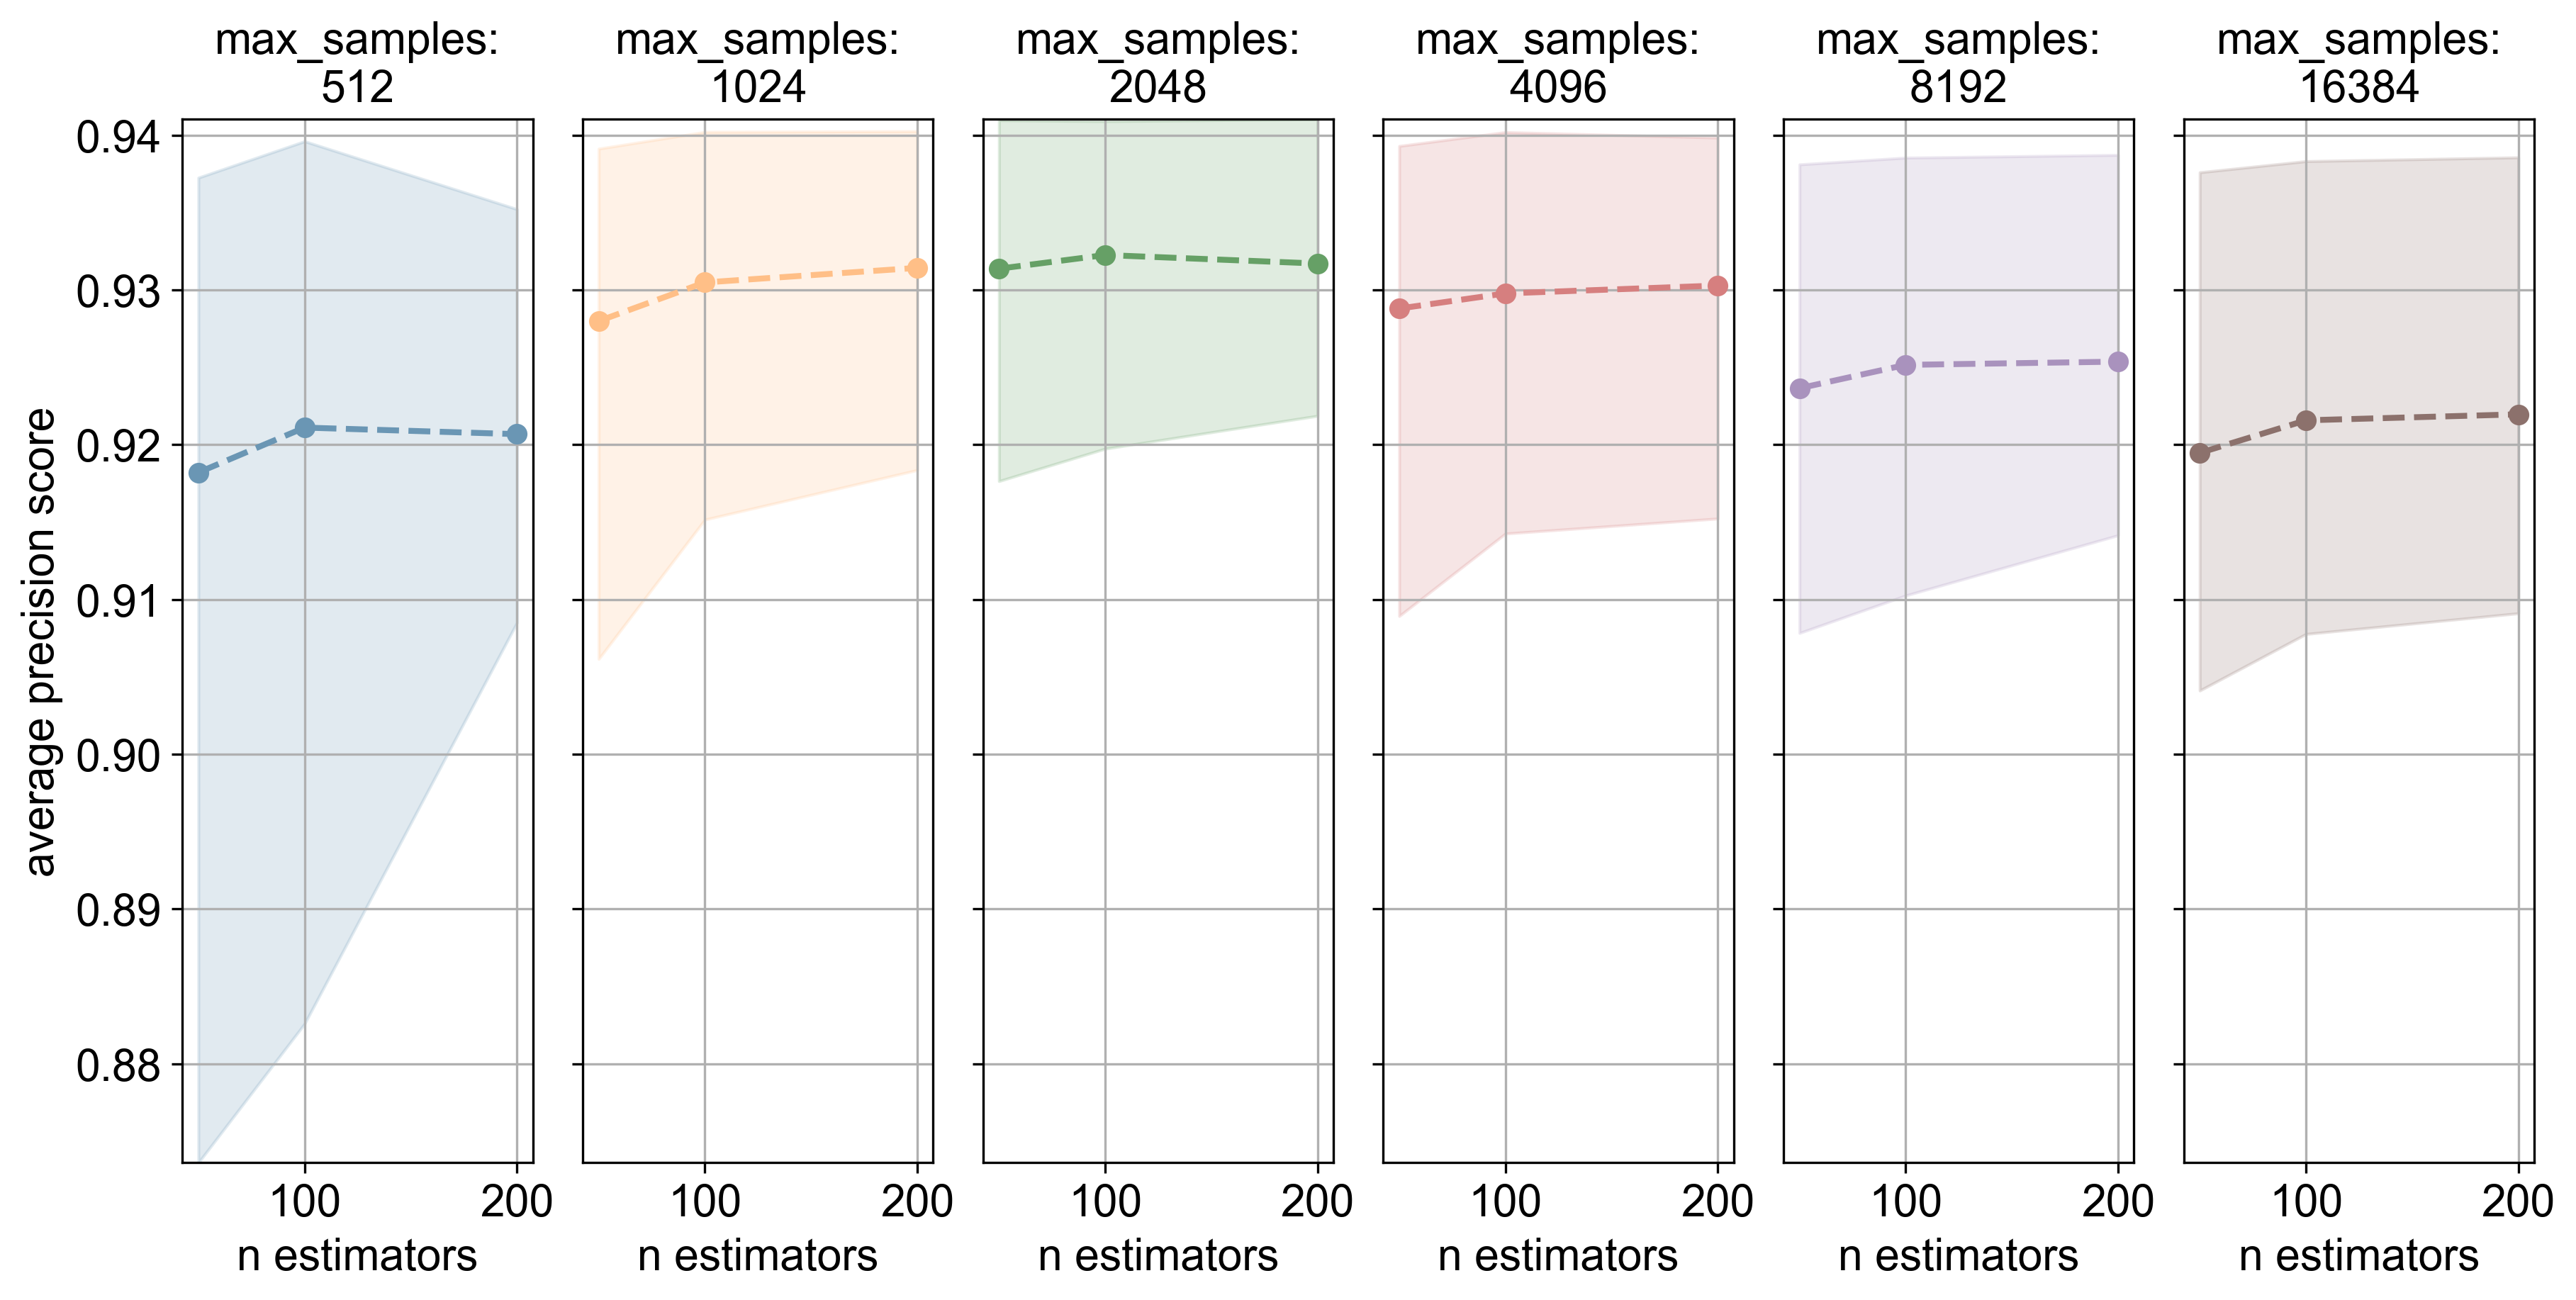

In [7]:
SCORE = 'average_precision_score'

printhtml('<h3>Score used: %s</h4>' % SCORE)
dfmin, dfmedian, dfmax = get_hyperparam_dfs(eval_df, SCORE, n_estimators=n_estimators, max_samples=max_samples)

printhtml('<h4>Min %s per hyperparameter (rounded to %d decimals)</h4>' % (SCORE, decimals))
display(dfmin.round(4))
printhtml('<h4>Median %s per hyperparameter (rounded to %d decimals)</h4>' % (SCORE, decimals))
display(dfmedian.round(4))
printhtml('<h4>Max %s per hyperparameter (rounded to %d decimals)</h4>' % (SCORE, decimals))
display(dfmax.round(4))

printhtml('<h3>%s vs "max_samples" for diffetent "n_estimators" values</h4>' % SCORE)
plot_hyperparam_dfs(dfmin, dfmedian, dfmax, ylabel=SCORE.replace('_', ' '))
printhtml('<h3>%s vs "n_estimators" for different "max_samples" values</h4>' % SCORE)
plot_hyperparam_dfs(dfmin.T, dfmedian.T, dfmax.T, ylabel=SCORE.replace('_', ' '))

Score used: roc_auc_score

Min roc_auc_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9164  0.9209  0.9269  0.9261  0.9307  0.9302
             100      0.9202  0.9281  0.9319  0.9322  0.9285  0.9324
             200      0.9209  0.9316  0.9325  0.9334  0.9336  0.9339

Median roc_auc_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9318  0.9413  0.9446  0.9427  0.9407  0.9405
             100      0.9353  0.9432  0.9459  0.9451  0.9426  0.9406
             200      0.9353  0.9433  0.9455  0.9452  0.9430  0.9415

Max roc_auc_score per hyperparameter (rounded to 4 decimals)

max_samples                                        
                       512     1024    2048    4096    8192    16384
n_estimators 50       0.9524  0.9530  0.9524  0.9524  0.9517  0.9512
             100      0.9531  0.9530  0.9530  0.9523  0.9515  0.9516
             200      0.9520  0.9529  0.9531  0.9521  0.9519  0.9515

roc_auc_score vs "max_samples" for diffetent "n_estimators" values

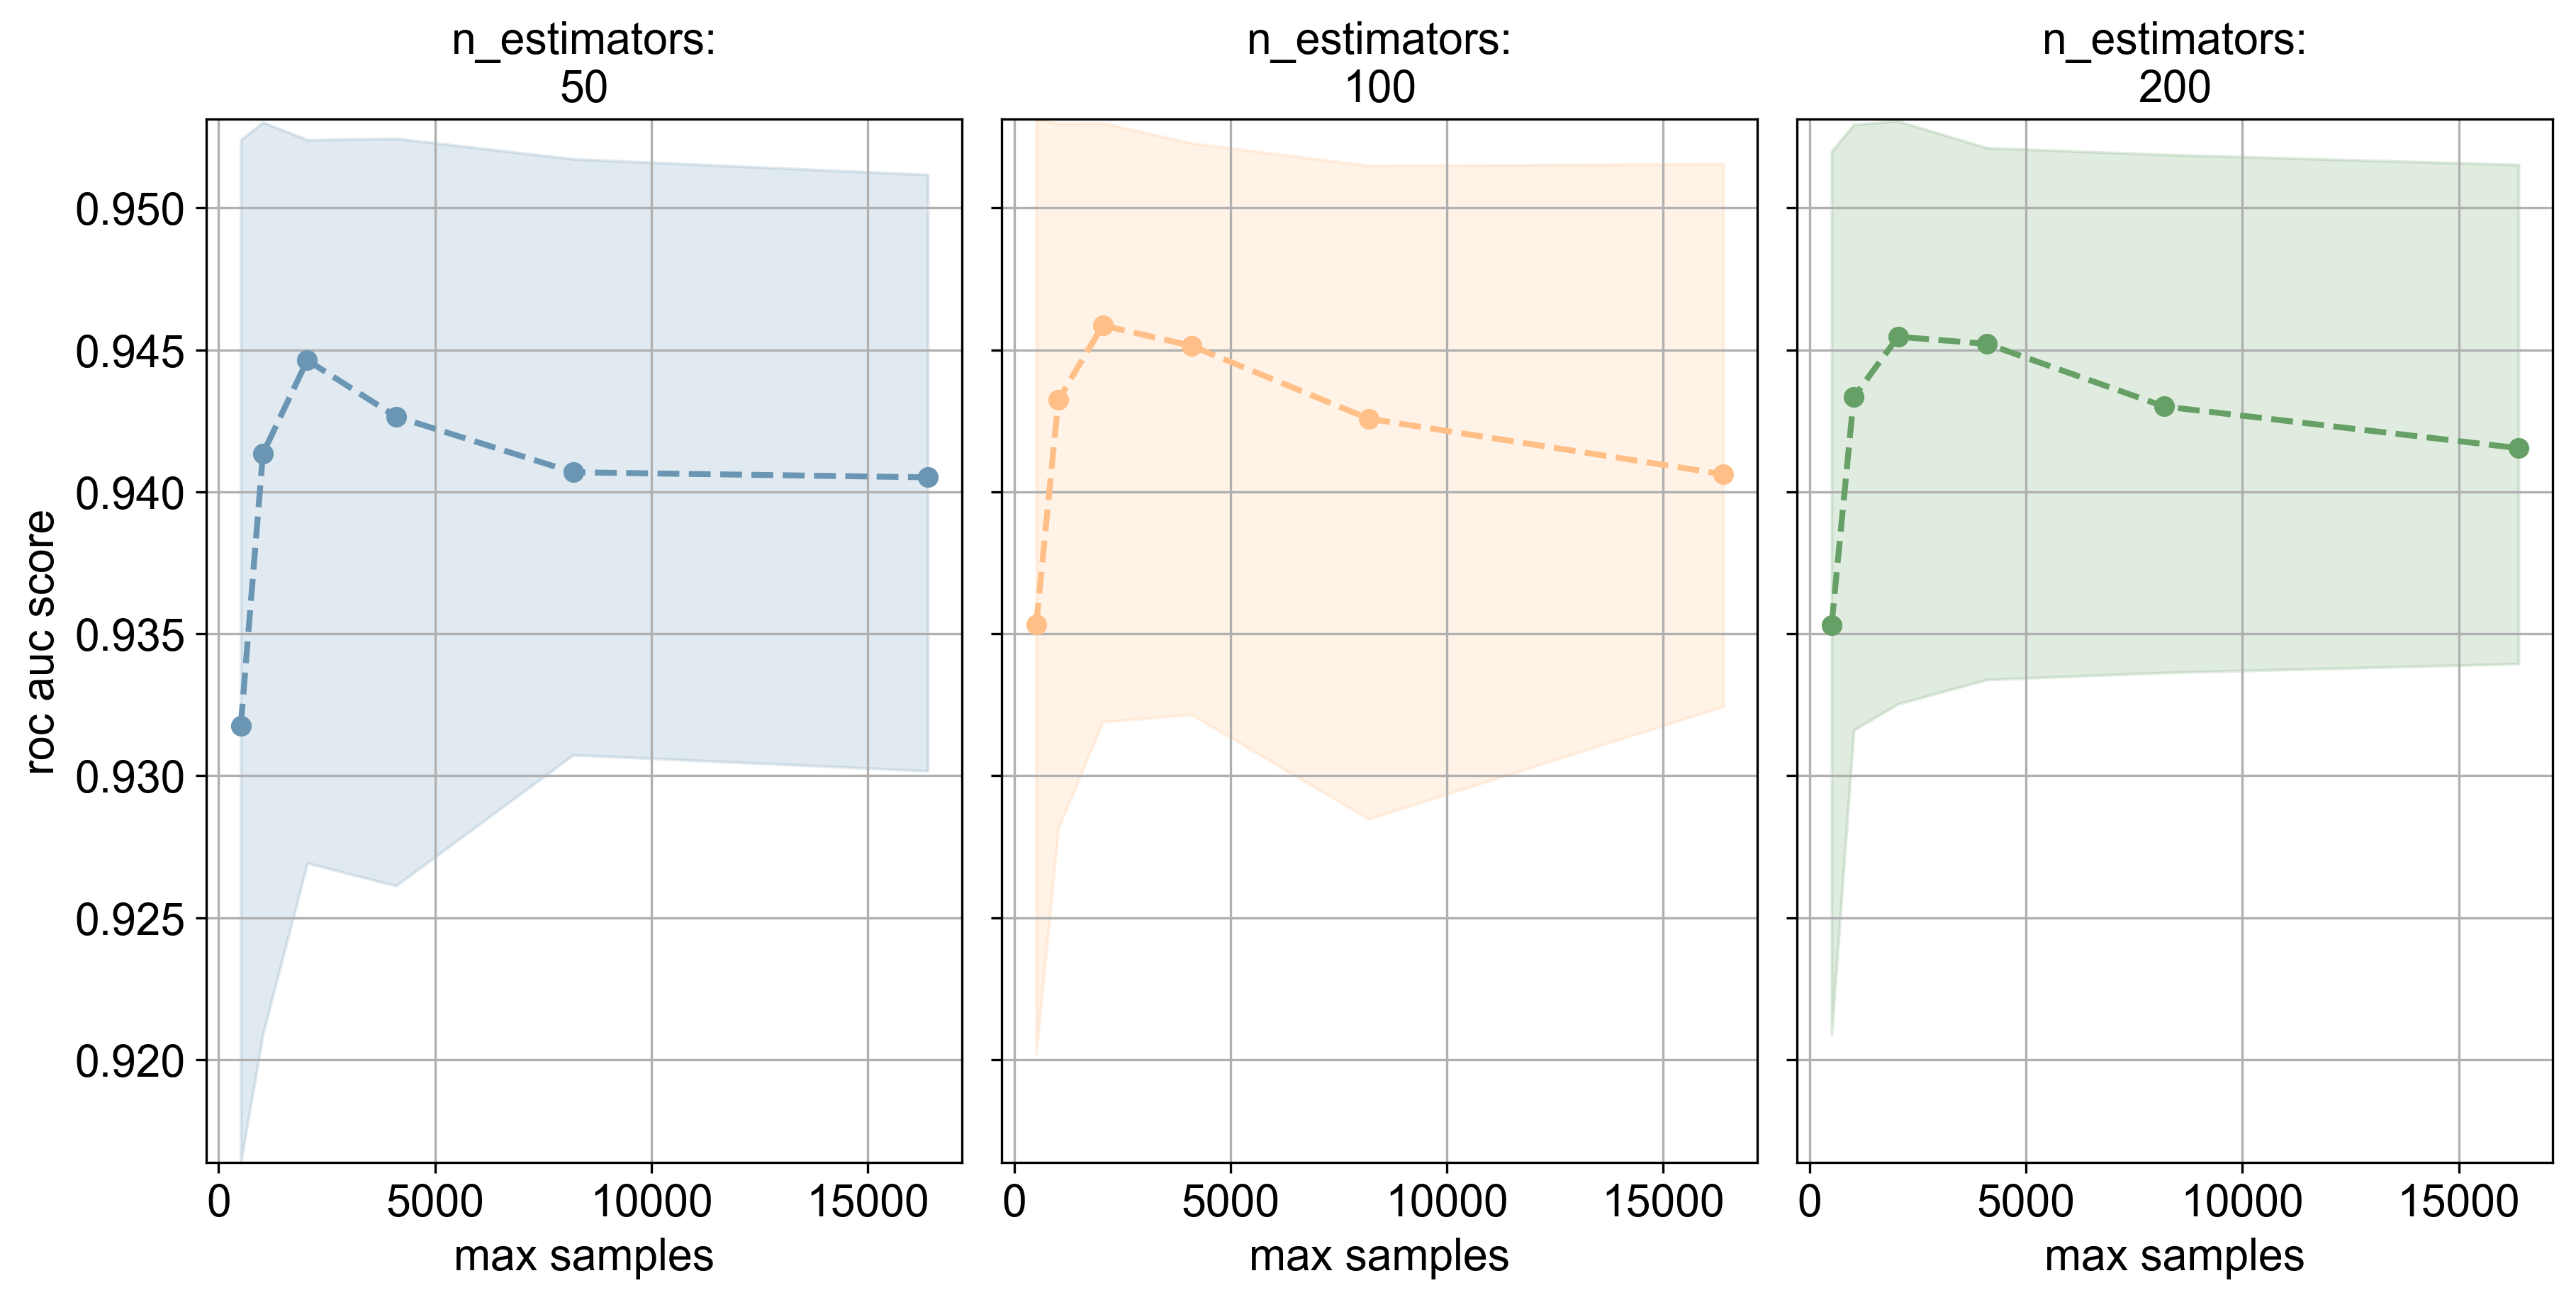

roc_auc_score vs "n_estimators" for different "max_samples" values

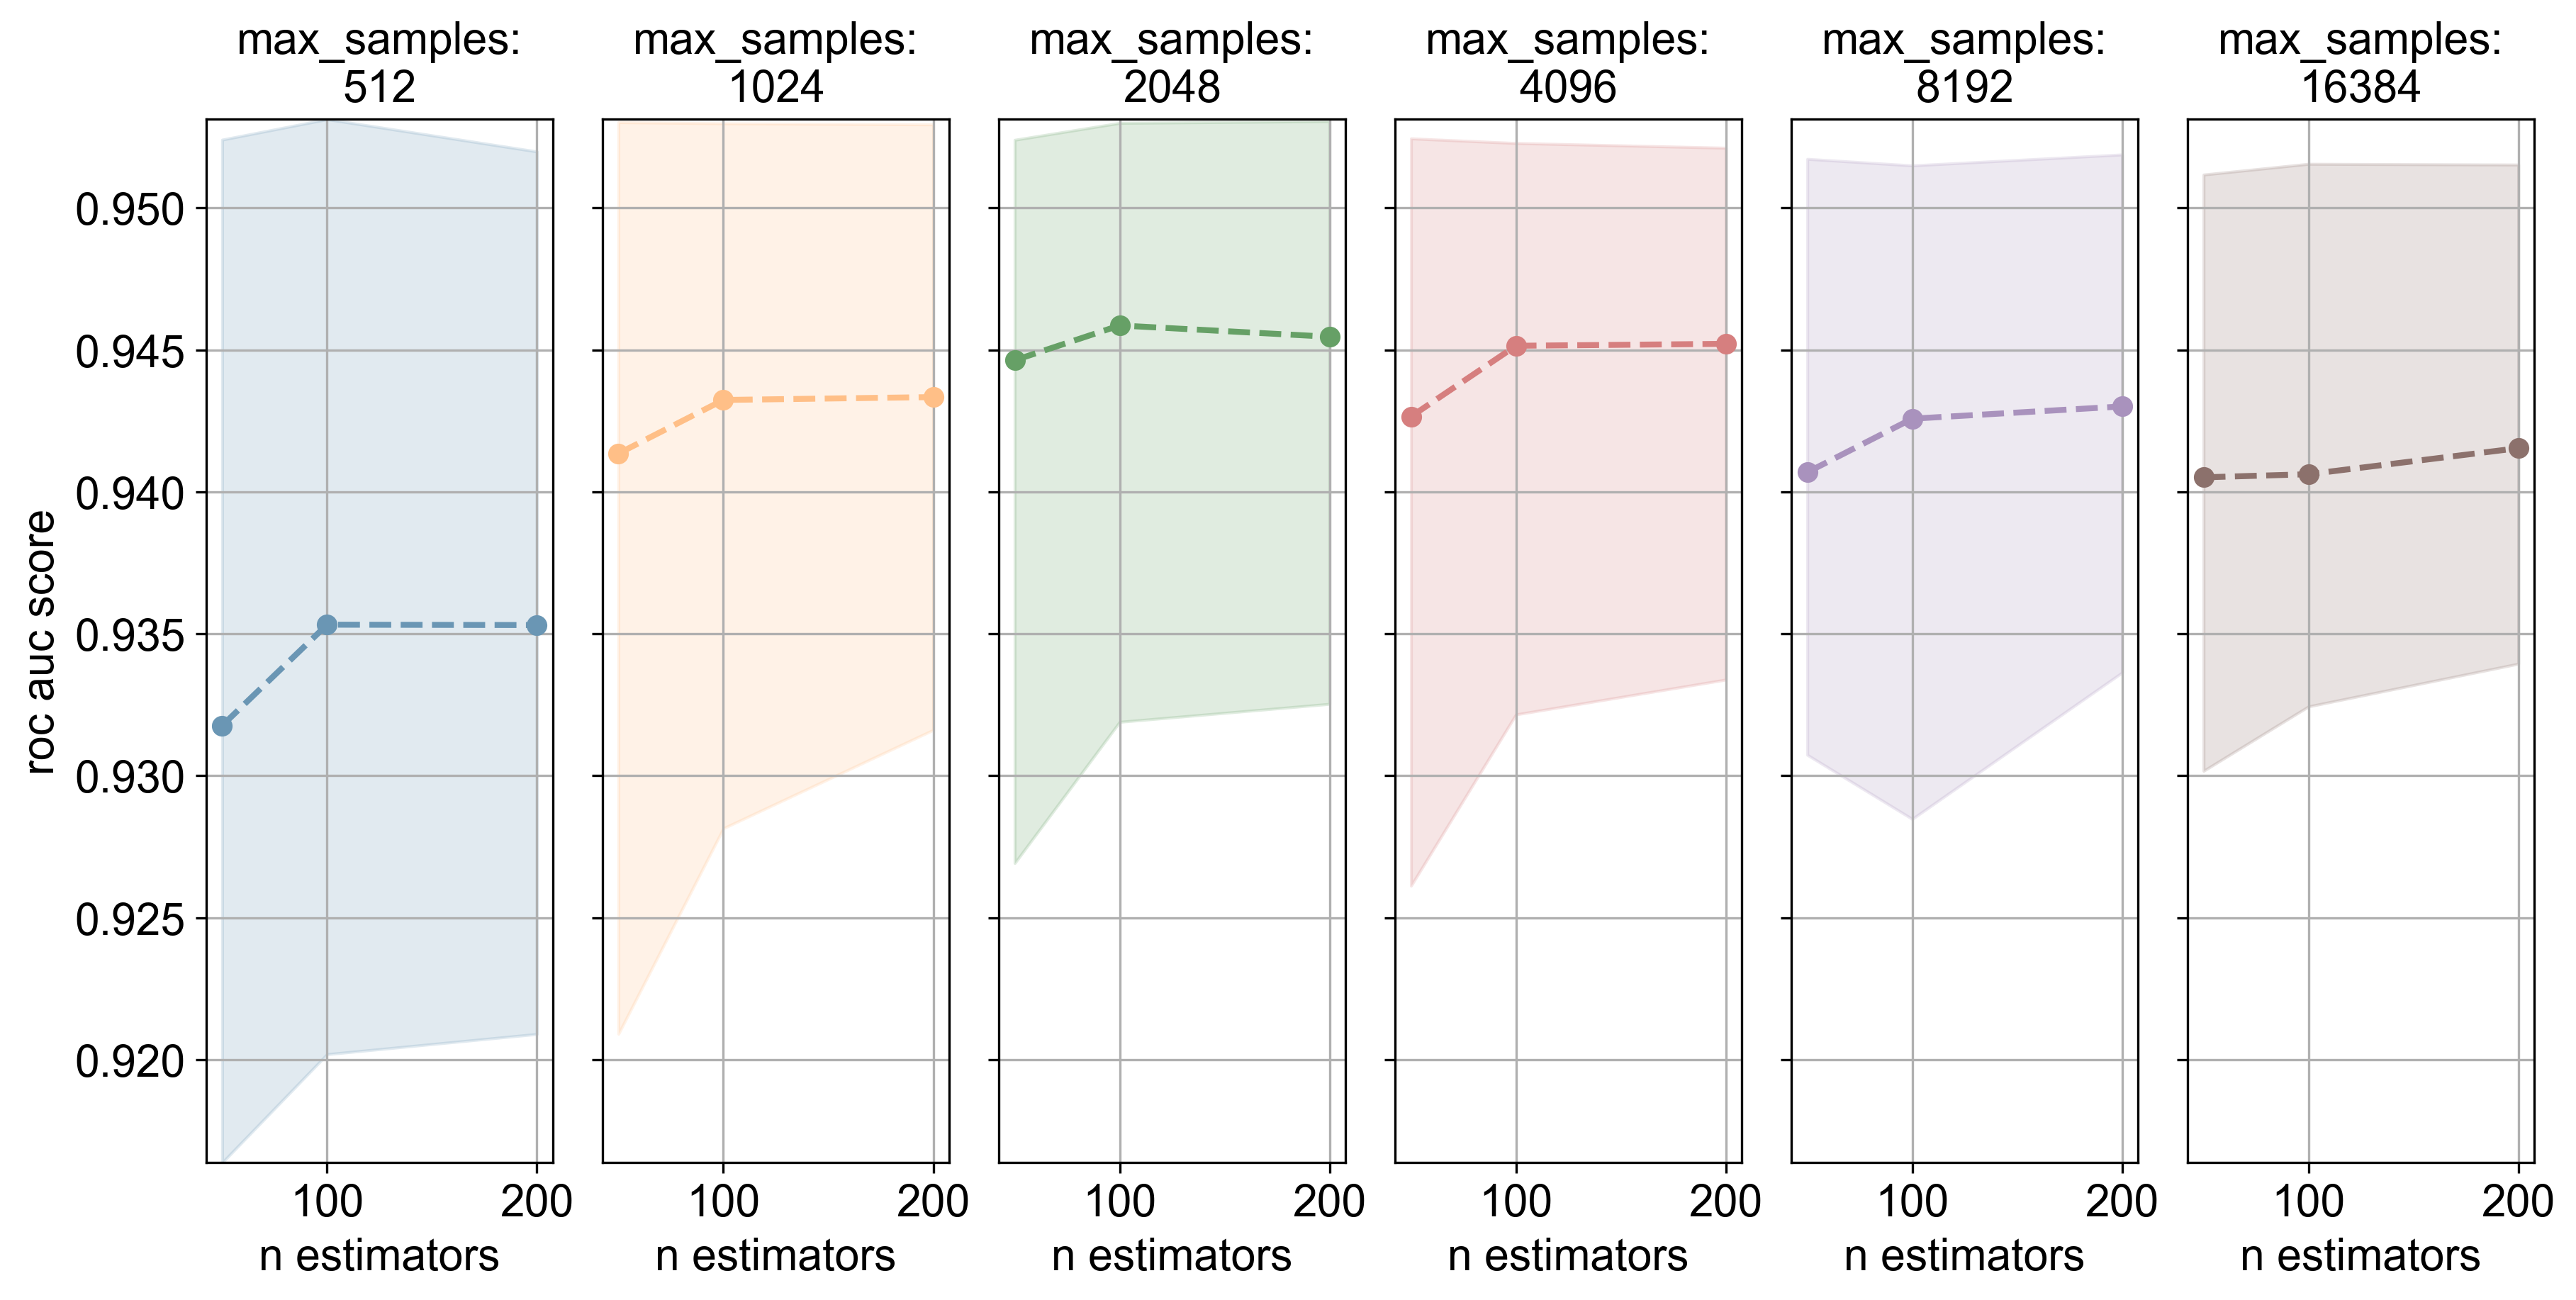

In [8]:
SCORE = 'roc_auc_score'

printhtml('<h3>Score used: %s</h4>' % SCORE)
dfmin, dfmedian, dfmax = get_hyperparam_dfs(eval_df, SCORE, n_estimators=n_estimators, max_samples=max_samples)

printhtml('<h4>Min %s per hyperparameter (rounded to %d decimals)</h4>' % (SCORE, decimals))
display(dfmin.round(4))
printhtml('<h4>Median %s per hyperparameter (rounded to %d decimals)</h4>' % (SCORE, decimals))
display(dfmedian.round(4))
printhtml('<h4>Max %s per hyperparameter (rounded to %d decimals)</h4>' % (SCORE, decimals))
display(dfmax.round(4))

printhtml('<h3>%s vs "max_samples" for diffetent "n_estimators" values</h4>' % SCORE)
plot_hyperparam_dfs(dfmin, dfmedian, dfmax, ylabel=SCORE.replace('_', ' '))
printhtml('<h3>%s vs "n_estimators" for different "max_samples" values</h4>' % SCORE)
plot_hyperparam_dfs(dfmin.T, dfmedian.T, dfmax.T, ylabel=SCORE.replace('_', ' '))